In [1]:
import laspy
import numpy as np
from utilities import load_lidar, visualize, simulate_noise

In [2]:
pc1 = 'data_mabel_test/pc_072E15NE25NE_20171009.copc.laz' # farm land near medicine hat

xyz, intensity, classification, scan_angle, header = load_lidar(pc1)

c:\Users\mabel\miniconda3\envs\enme618\Lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\mabel\miniconda3\envs\enme618\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


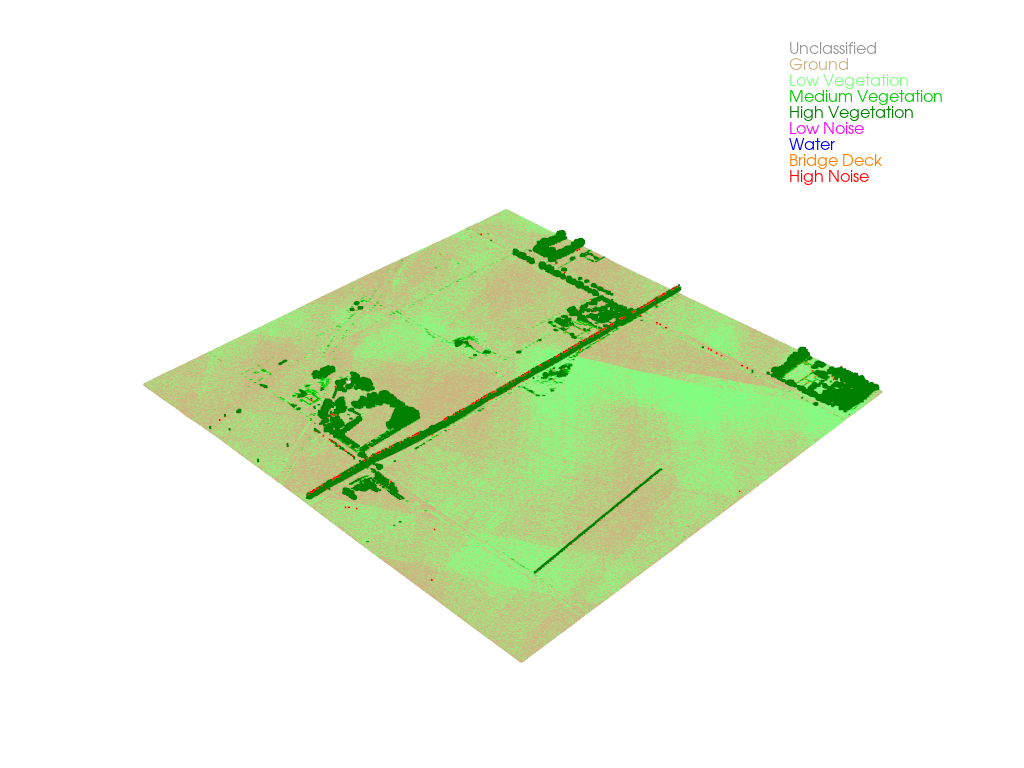

In [3]:
visualize(xyz, classification)

In [4]:
xyz_noisy, classification_noisy, intensity_noisy = simulate_noise(
    xyz,
    intensity=intensity,
    classification=classification,
    scan_angle=np.radians(scan_angle),
    apply={
        "range": True,
        "horizontal": True,
        "scan_angle": True,
        "surface": True,
        "outliers": True,
        "intensity": True
    },
    num_outliers=10000  # only 10k extra noise points
)

c:\Users\mabel\miniconda3\envs\enme618\Lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\mabel\miniconda3\envs\enme618\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


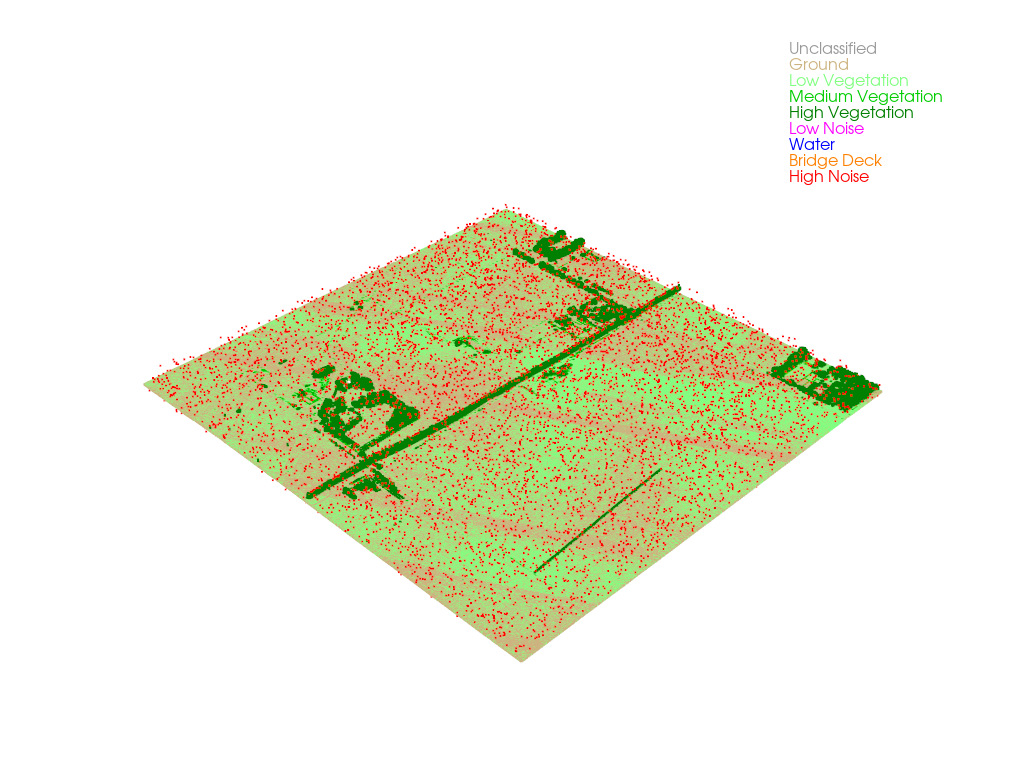

In [5]:
visualize(xyz_noisy, classification_noisy)

In [6]:
np.unique(classification_noisy)

array([ 2,  3,  4,  5, 18])

In [10]:
print(np.min(xyz_noisy[:,0]))
print(np.max(xyz_noisy[:,0]))
print(np.min(xyz_noisy[:,1]))
print(np.max(xyz_noisy[:,1]))

519053.0
520178.09375
5532873.5
5534036.0


In [16]:
cp_data = np.hstack((xyz, intensity.reshape(-1, 1) ))
#print(xyz.shape)
#print(intensity.shape)

In [19]:
N = cp_data.shape[0]
sample_size = int(0.1 * N)  # 1%
indices = np.random.choice(N, sample_size, replace=False)
data_1pct = cp_data[indices]

In [20]:
data_1pct.shape

(1085671, 4)